In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/usr/local/opt/python@3.13/bin/python3.13
3.13.3 (main, Apr  8 2025, 13:54:08) [Clang 17.0.0 (clang-1700.0.13.3)]
sys.version_info(major=3, minor=13, micro=3, releaselevel='final', serial=0)


# A quick tutorial of taking numerical derivative of noisy data with PyNumDiff

This notebook walks through each of the methods implemented in PyNumDiff.

### Notations:
  * dt: (float) time step
  * x: (np.array with length N) the noisy time series you want to differentiate
  * x_hat: (np.array like x) the smoothed estimate of x
  * x_truth: (np.array like x) the true value of x (which is accessible when the data is simulated, and used for plotting purposes only)
  * dxdt_hat: (np.array like x) the estimate of the derivative of x
  * dxdt_truth: (np.array like x) the true value of dxdt (which is accessible when the data is simulated, and used for plotting purposes only)

In [2]:
import os
import sys
import time
import numpy as np

# local import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pynumdiff
import pynumdiff.utils.simulate as simulate
import pynumdiff.utils.evaluate as evaluate

## 0. Simulate synthetic data

### PyNumDiff comes with 6 different toy problems:
* lorenz_x: (nonlinear) x component of a lorenz attractor
* sine: (linear) sum of two sines
* linear_autonomous: (linear) linear time invariant system: dx/dt = Ax  
* pop_dyn: (nonlinear) bounded exponential growth
* triangle: (nonlinear) sharp-edged triangle wave with increasing frequency
* pi_control: (linear / nonlinear) linear proportional integral controller with nonlinear control inputs

In [3]:
# simulation parameters

# noise is generated using np.random, e.g. 'normal', 'uniform', 'poisson'
# noise_type and noise_parameters should be compatible with np.random functions 

noise_type = 'normal'
noise_parameters = [0, 0.1]  # mean and std

# time step size and time series length in TIME
dt = 0.01
timeseries_length = 4

In [4]:
# simulate data

x, x_truth, dxdt_truth, _ = simulate.pi_control(dt=dt, timeseries_length=timeseries_length, 
                                                noise_type=noise_type, noise_parameters=noise_parameters)

## 1. Finite Difference

### 1.1 Finite Difference: First Order

RMS error in velocity:  6.820305856536253


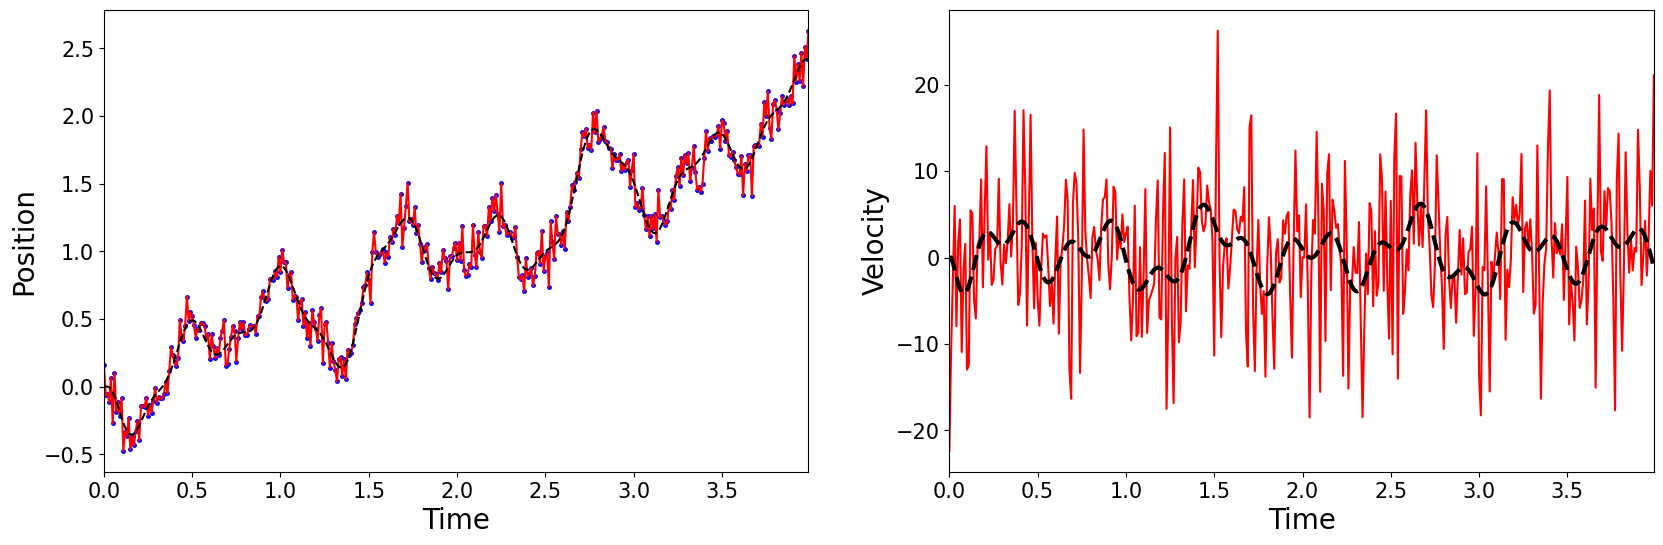

In [5]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.2 Finite Difference: Iterated First Order

RMS error in velocity:  0.8106943046063786


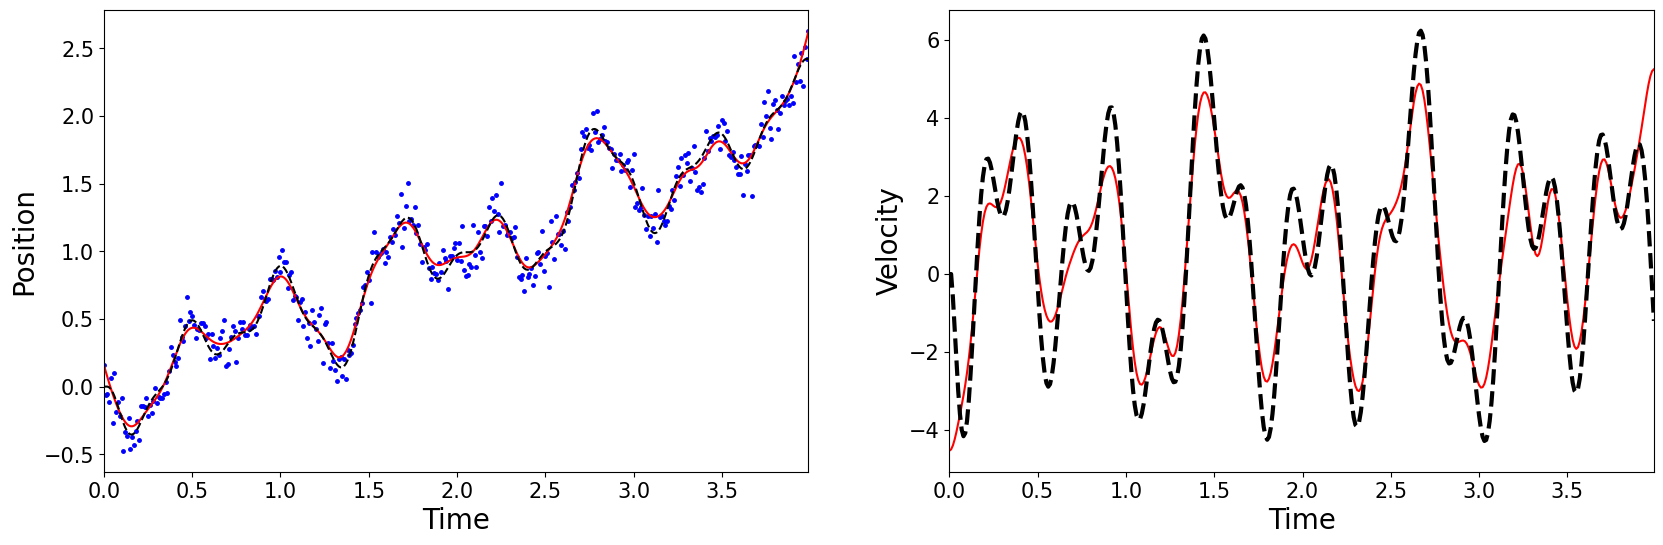

In [7]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt, num_iterations=50)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.3 Finite Difference: Second Order

RMS error in velocity:  6.820305856536253


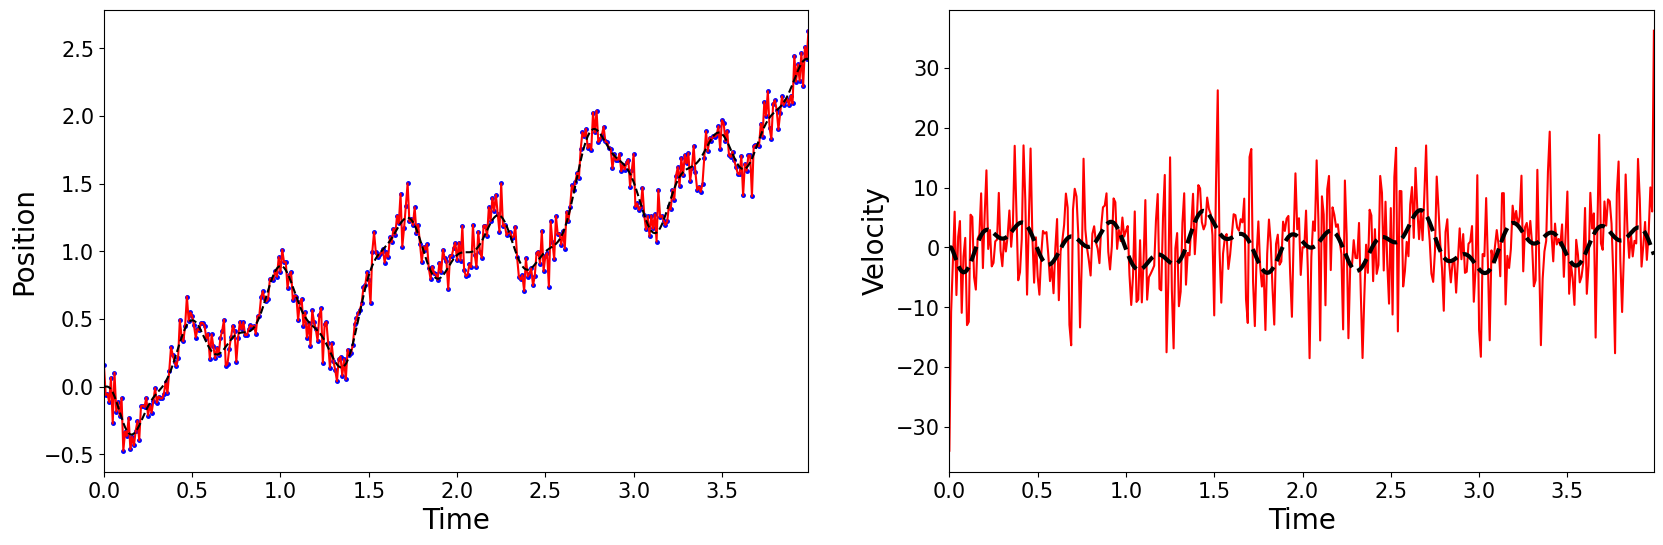

In [6]:
x_hat, dxdt_hat = pynumdiff.finite_difference.second_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.4 Finite Difference: Fourth Order

In [18]:
x_hat, dxdt_hat = pynumdiff.finite_difference.fourth_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

AttributeError: module 'pynumdiff.finite_difference' has no attribute 'fourth_order'

## 2. Smooth Finite Difference

### 2.1 Smooth Finite Difference: Median smoothing

RMS error in velocity:  1.7921026453896767


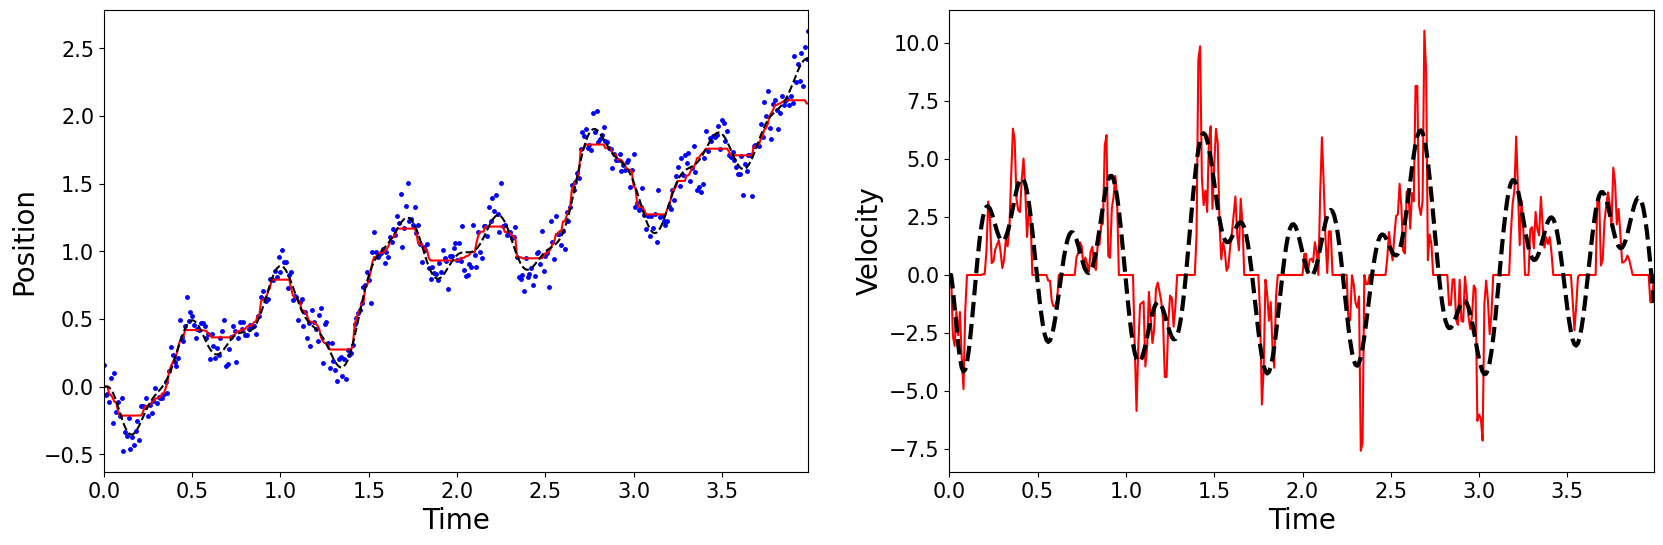

In [8]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.mediandiff(x, dt, window_size=20, num_iterations=4)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.2 Smooth Finite Difference: Mean smoothing

RMS error in velocity:  1.1639595851534266


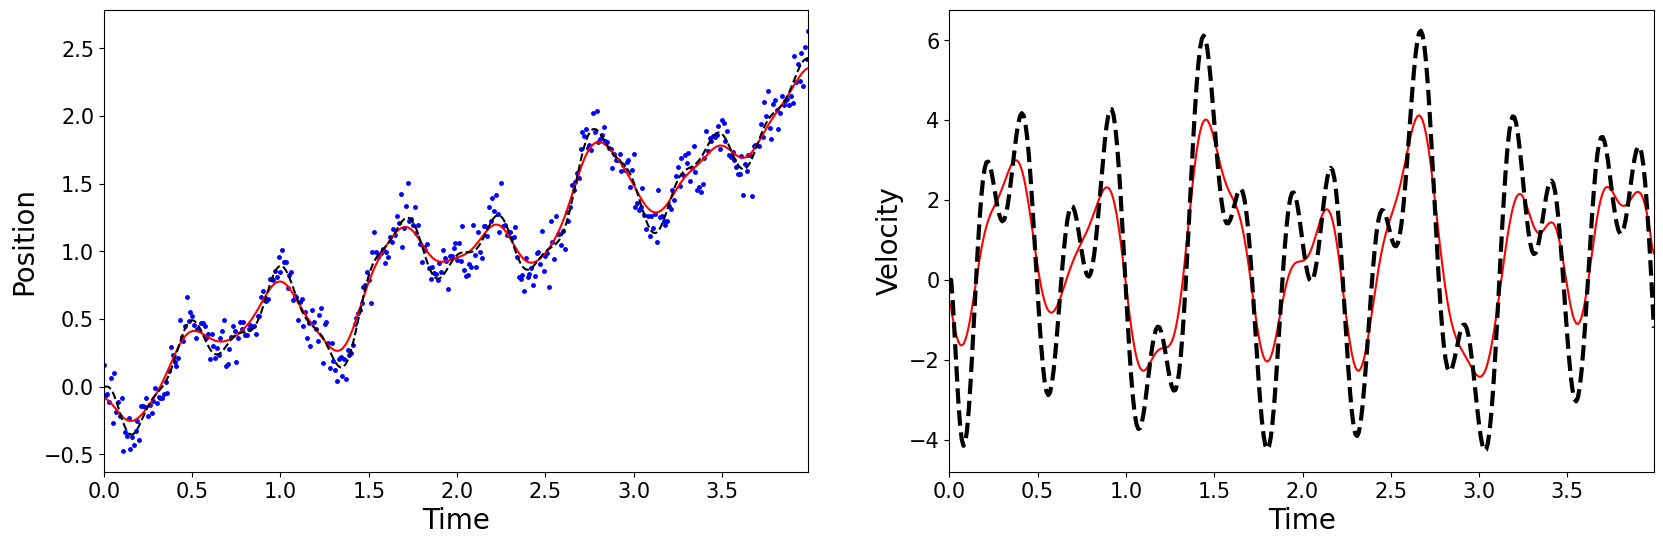

In [9]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.meandiff(x, dt, window_size=10, num_iterations=5)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.3 Smooth Finite Difference: Gaussian smoothing

RMS error in velocity:  0.630671459152812


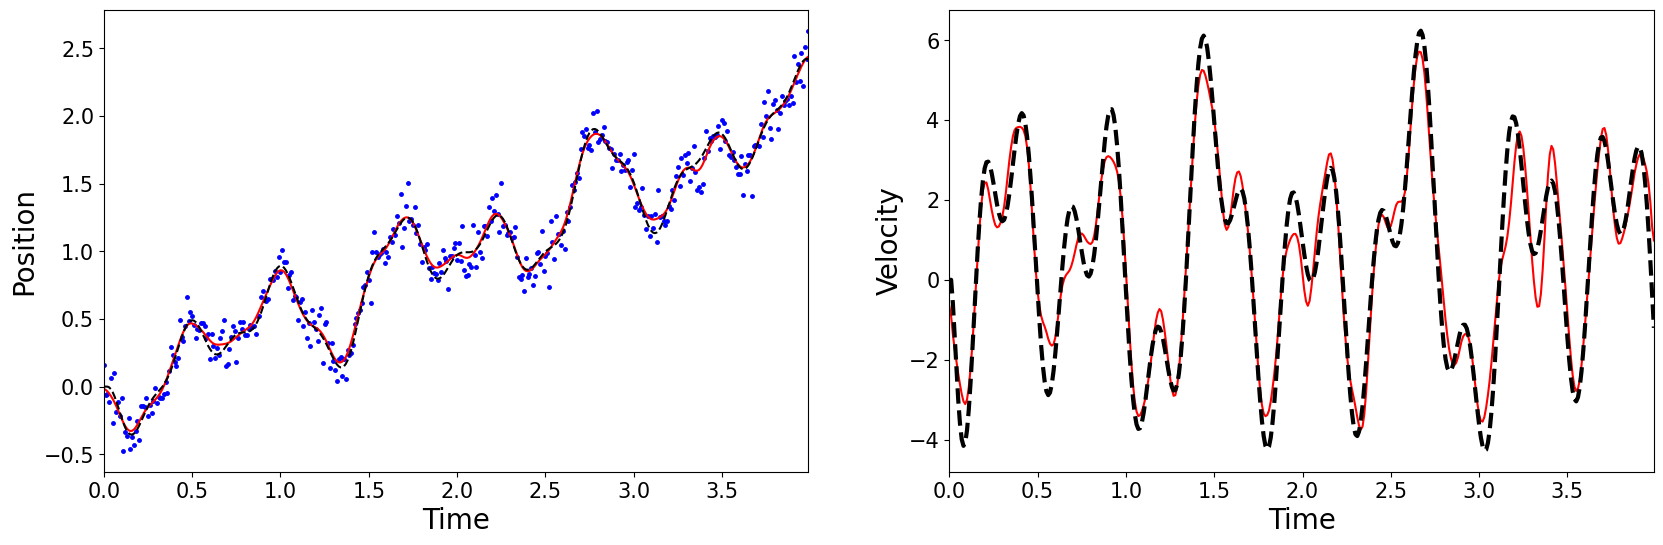

In [10]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, window_size=20)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.4 Smooth Finite Difference: Friedrichs smoothing

RMS error in velocity:  1.174772532604082


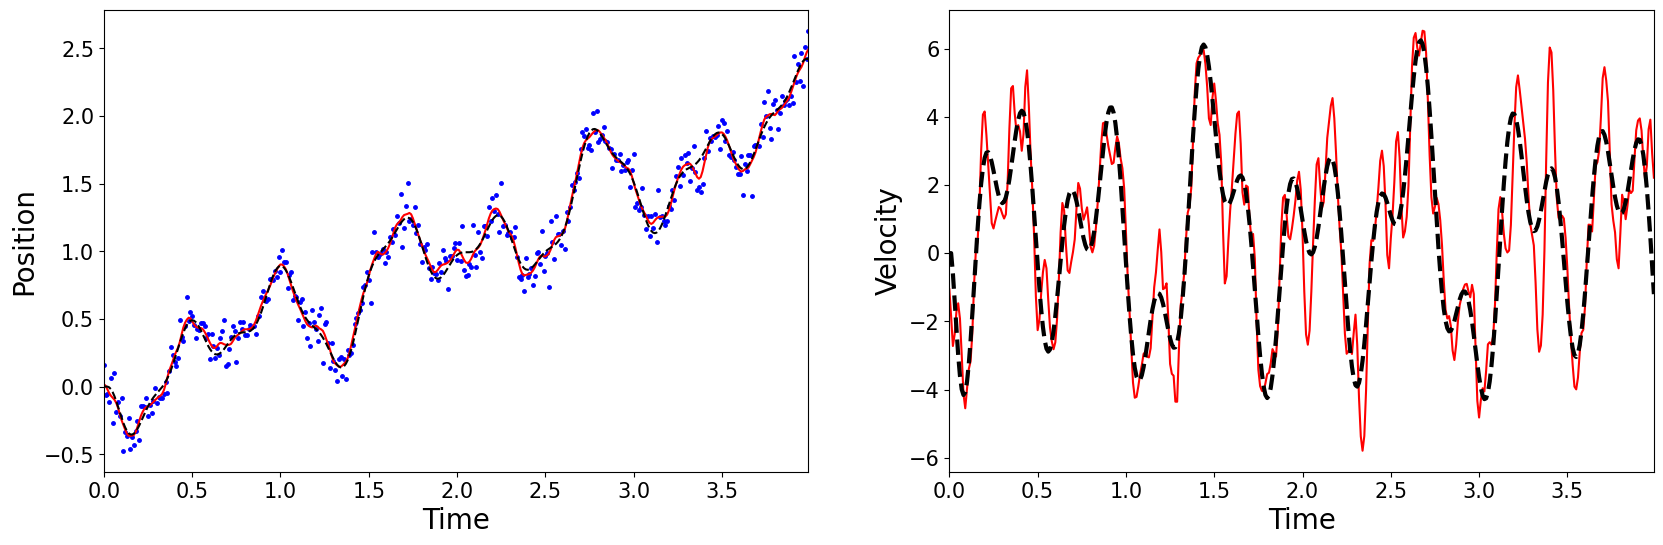

In [11]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, window_size=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.5 Smooth Finite Difference: Butterworth smoothing

RMS error in velocity:  0.53468383060071


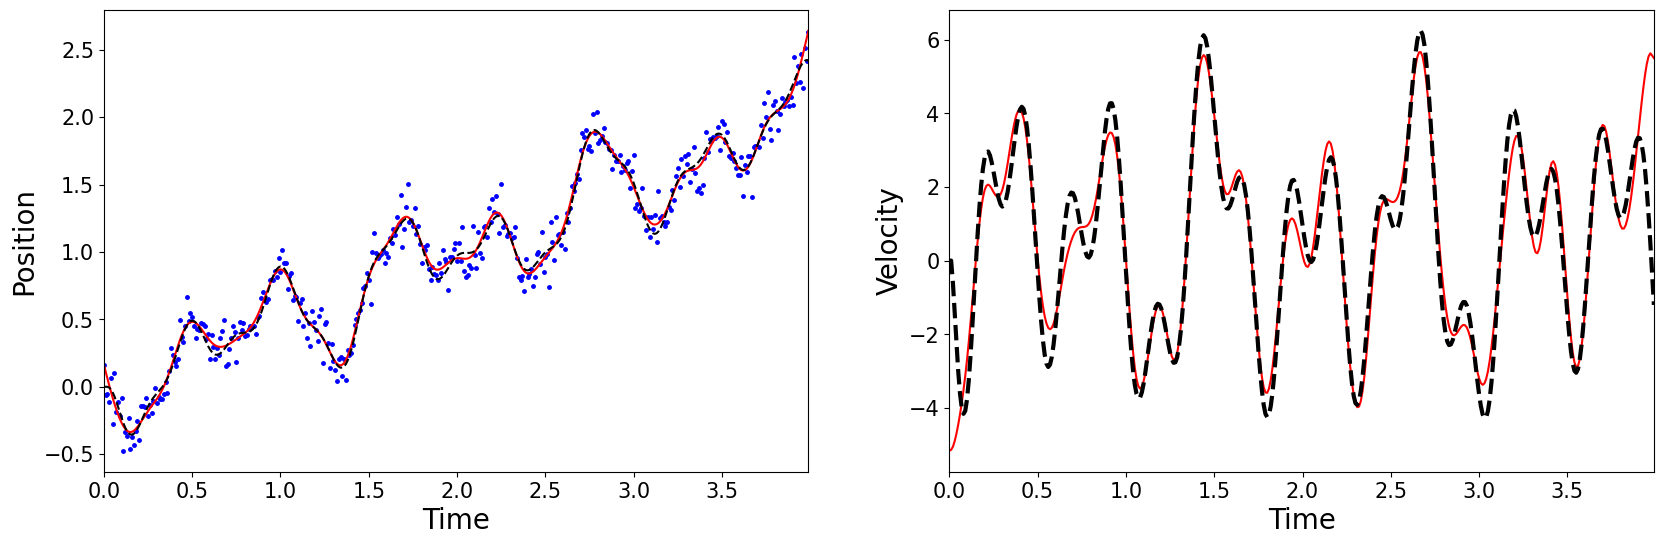

In [12]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.butterdiff(x, dt, filter_order=3, cutoff_freq=0.09)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.6 Smooth Finite Difference: Spline smoothing

RMS error in velocity:  1.5803503878950844


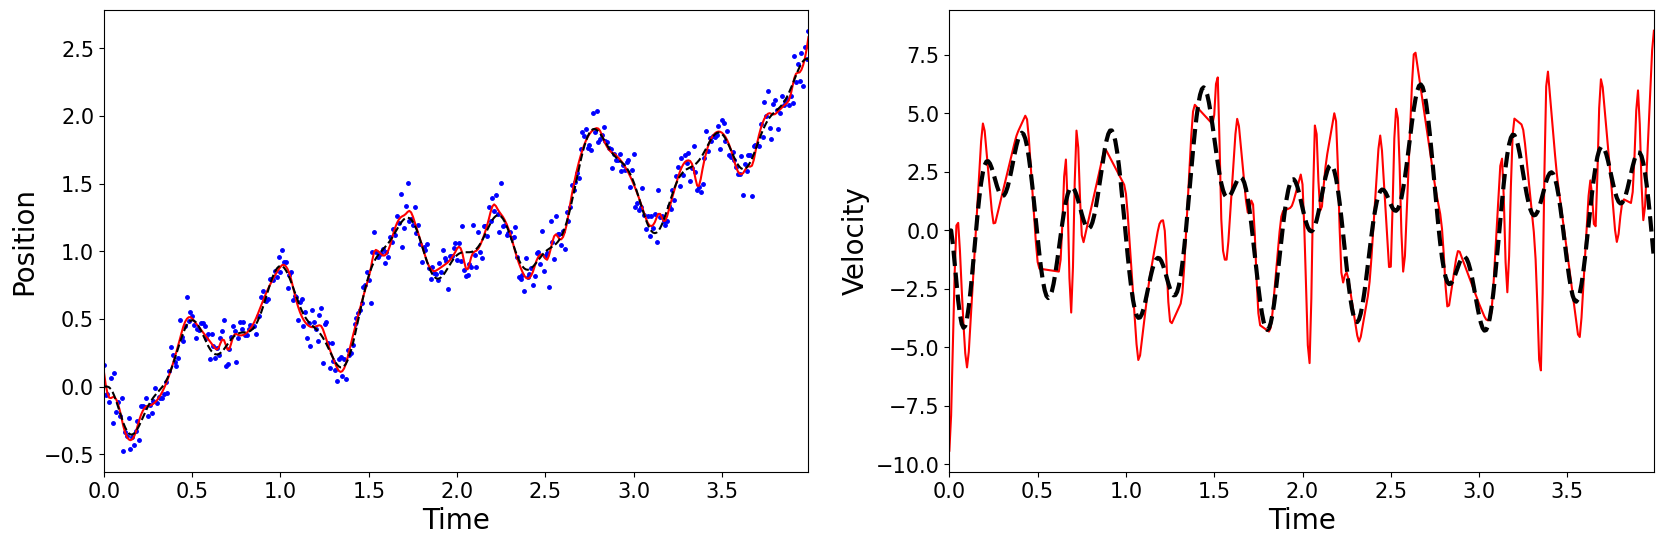

In [13]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.splinediff(x, dt, order=2, s=3)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

## 3. Total Variation Regularization

### 3.1 Iterative Total Variation Regularization (regularized velocity)

RMS error in velocity:  0.834234713460044


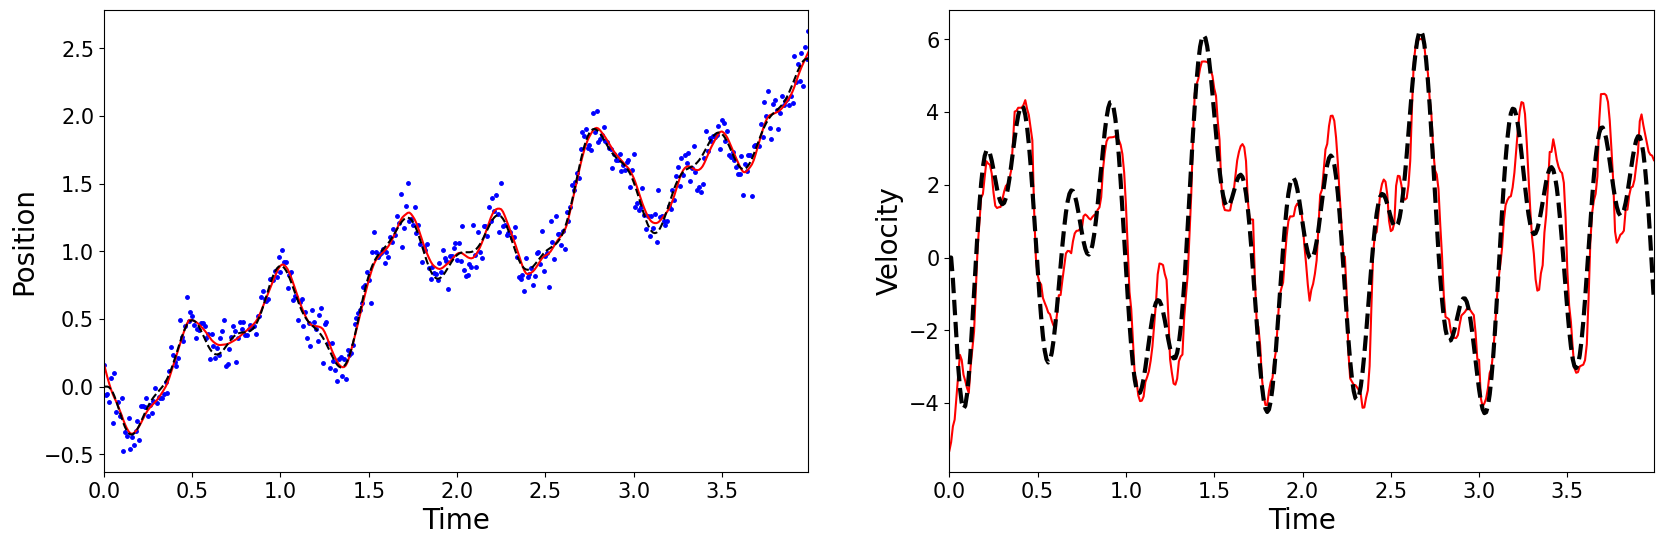

In [14]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.iterative_velocity(x, dt, num_iterations=1, gamma=0.001)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.2 Convex Total Variation Regularization: regularize velocity

RMS error in velocity:  0.9552124065115736


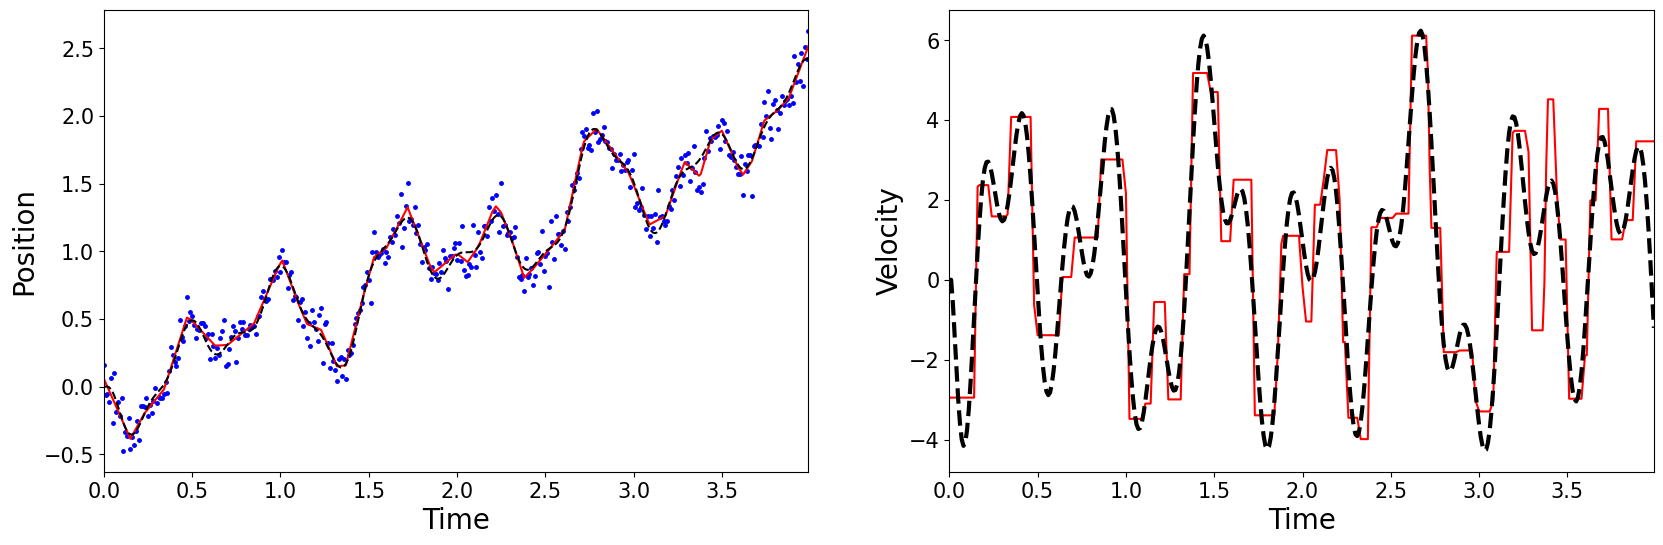

In [15]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.velocity(x, dt, gamma=1)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.3 Convex Total Variation Regularization: regularize acceleration

RMS error in velocity:  0.9083840870405048


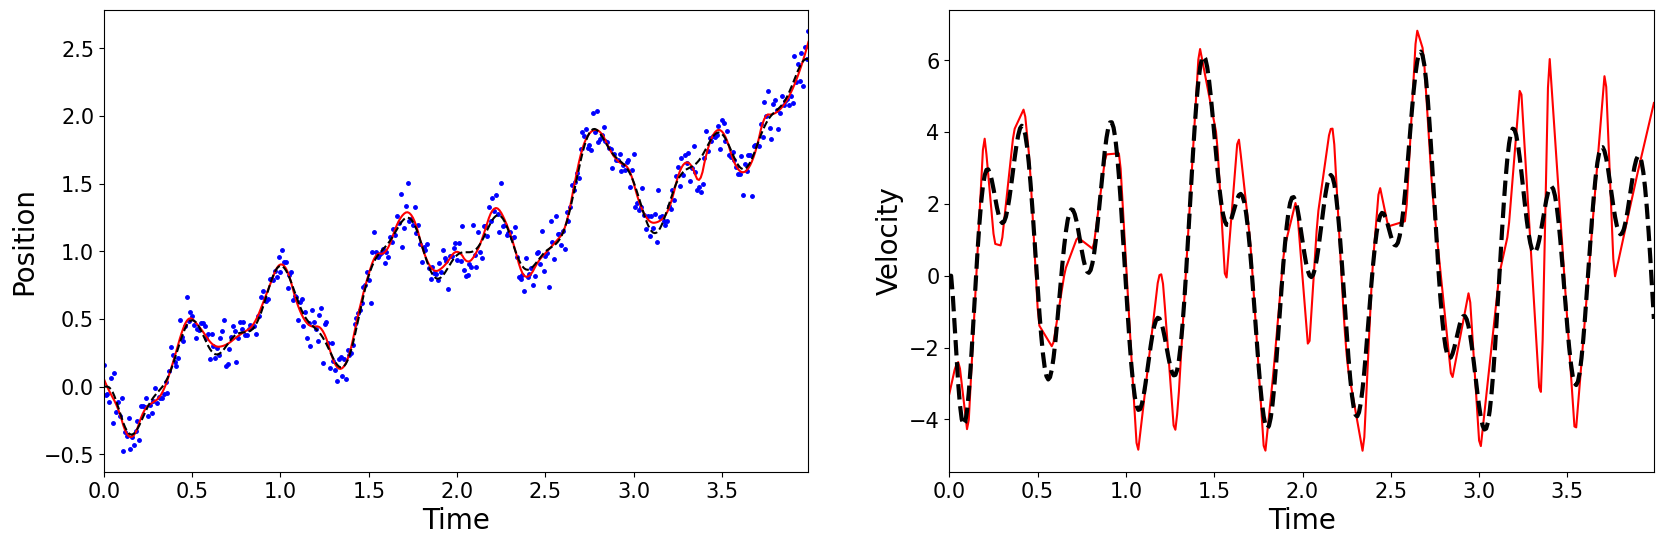

In [16]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.acceleration(x, dt, gamma=1)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.4  Convex Total Variation Regularization: regularize jerk

RMS error in velocity:  0.5755541153161742


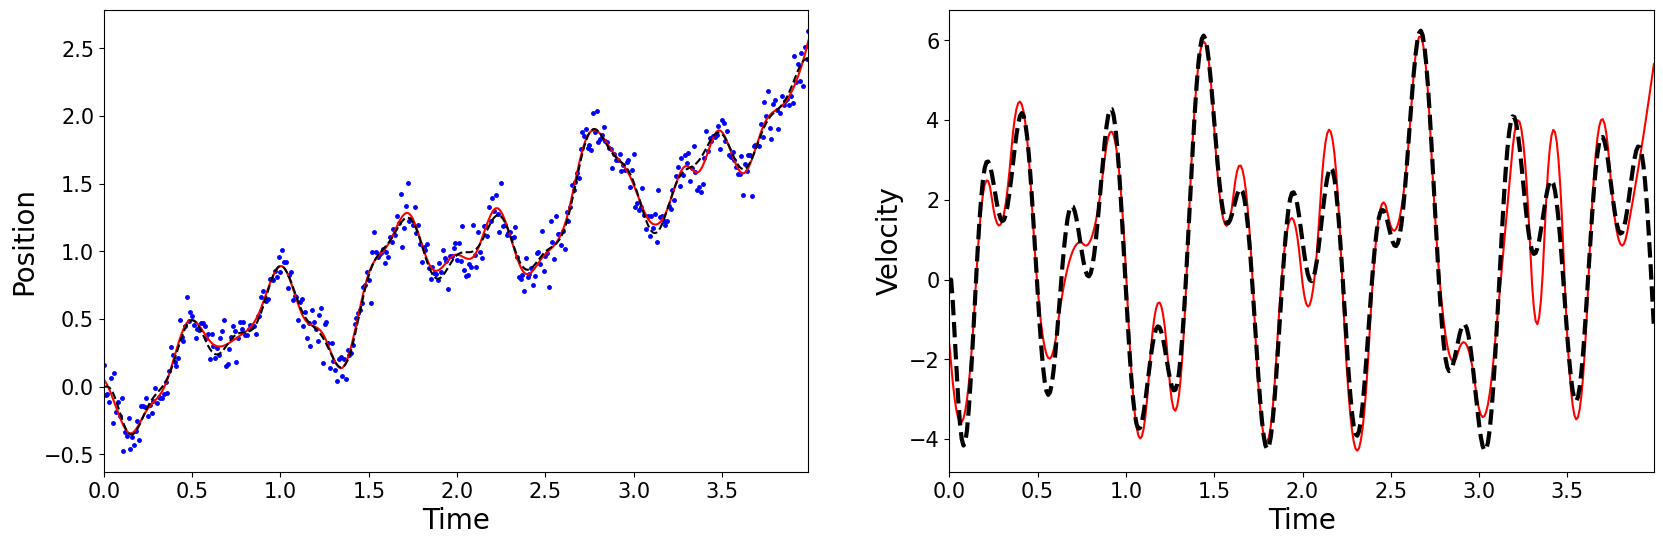

In [17]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk(x, dt, gamma=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.5 Convex Total Variation Regularization: regularize acceleration with gaussian smoothing

RMS error in velocity:  0.725985419245553


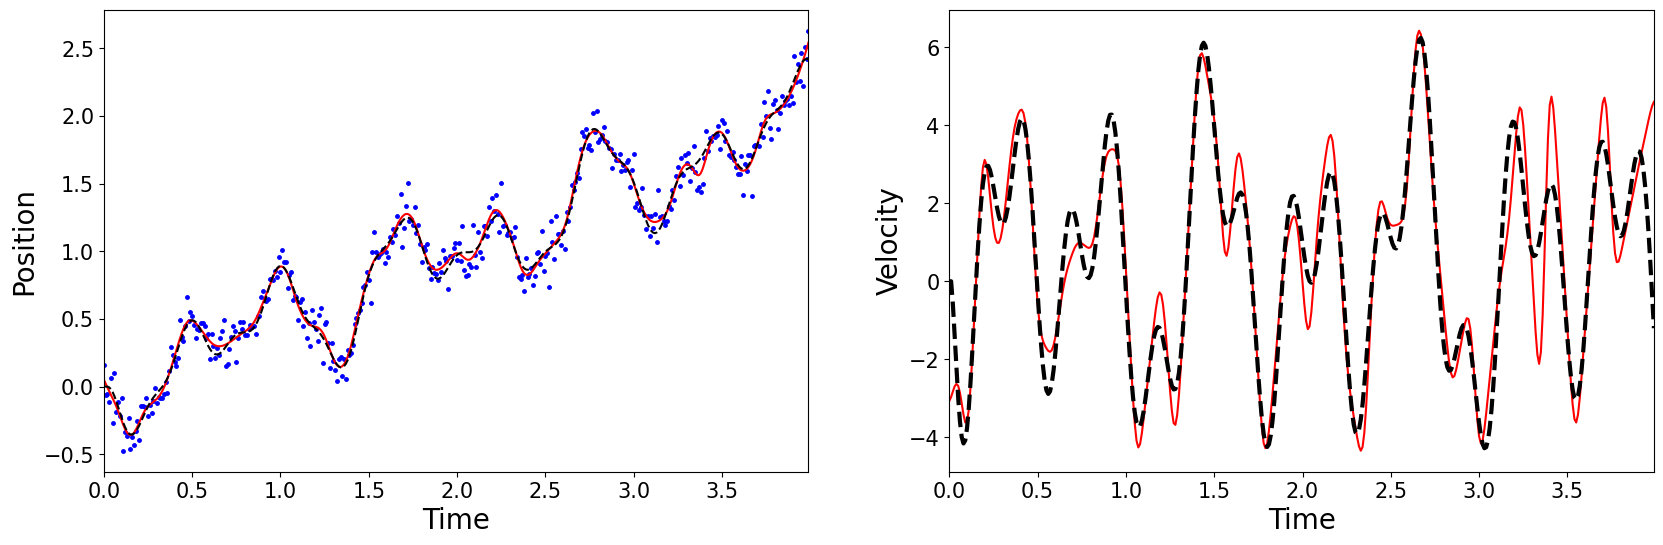

In [19]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.smooth_acceleration(x, dt, gamma=1, window_size=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.6 Convex Total Variation Regularization: regularize jerk in a sliding window

RMS error in velocity:  0.7776918031912634


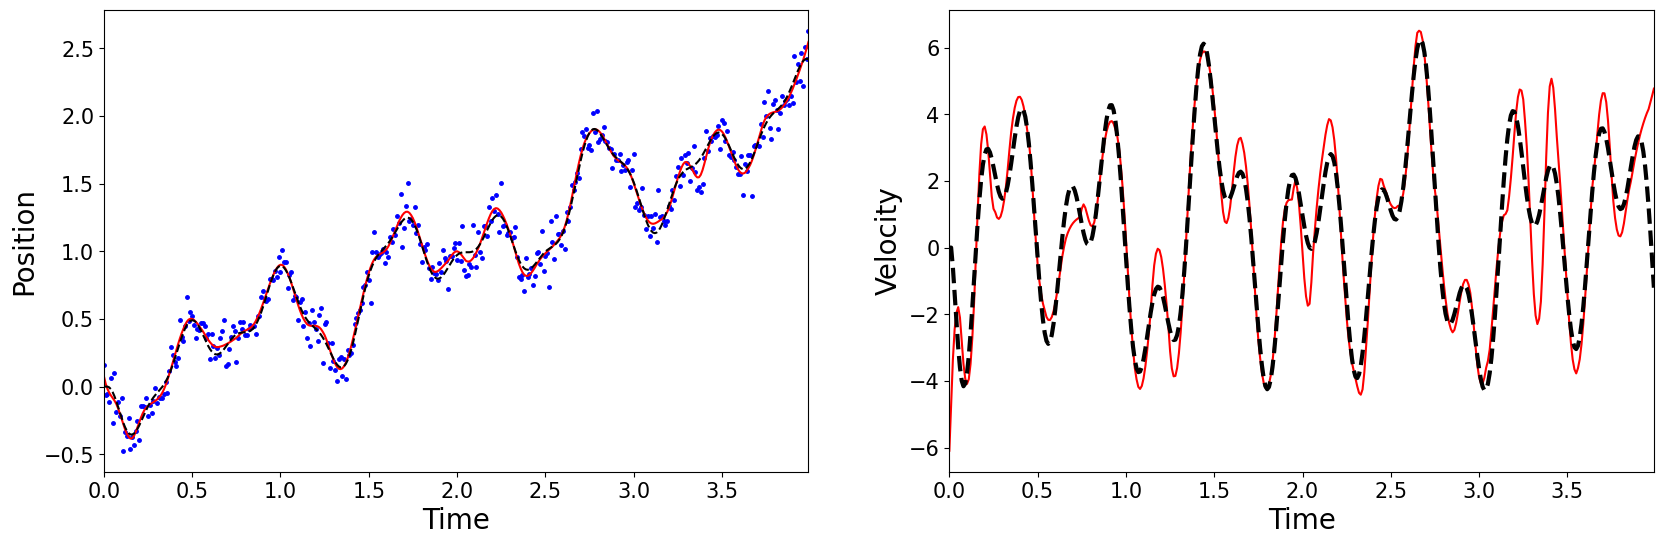

In [40]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk_sliding(x, dt, gamma=10, window_size=51)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

## 4. Linear Models

### 4.1 Linear Models: Spectral derivative

RMS error in velocity:  0.6000785062126386


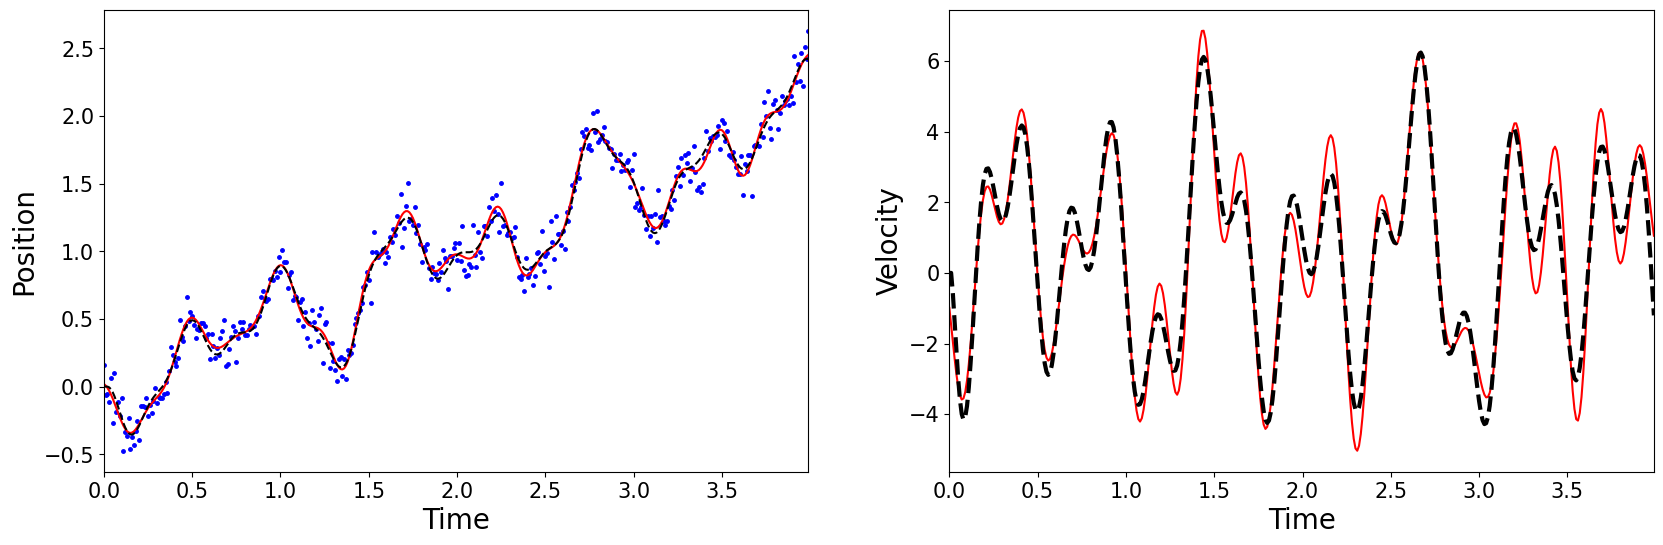

In [41]:
x_hat, dxdt_hat = pynumdiff.linear_model.spectraldiff(x, dt, high_freq_cutoff=0.05)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.2 Linear Models: Sliding polynomial fit

RMS error in velocity:  0.7733512026035324


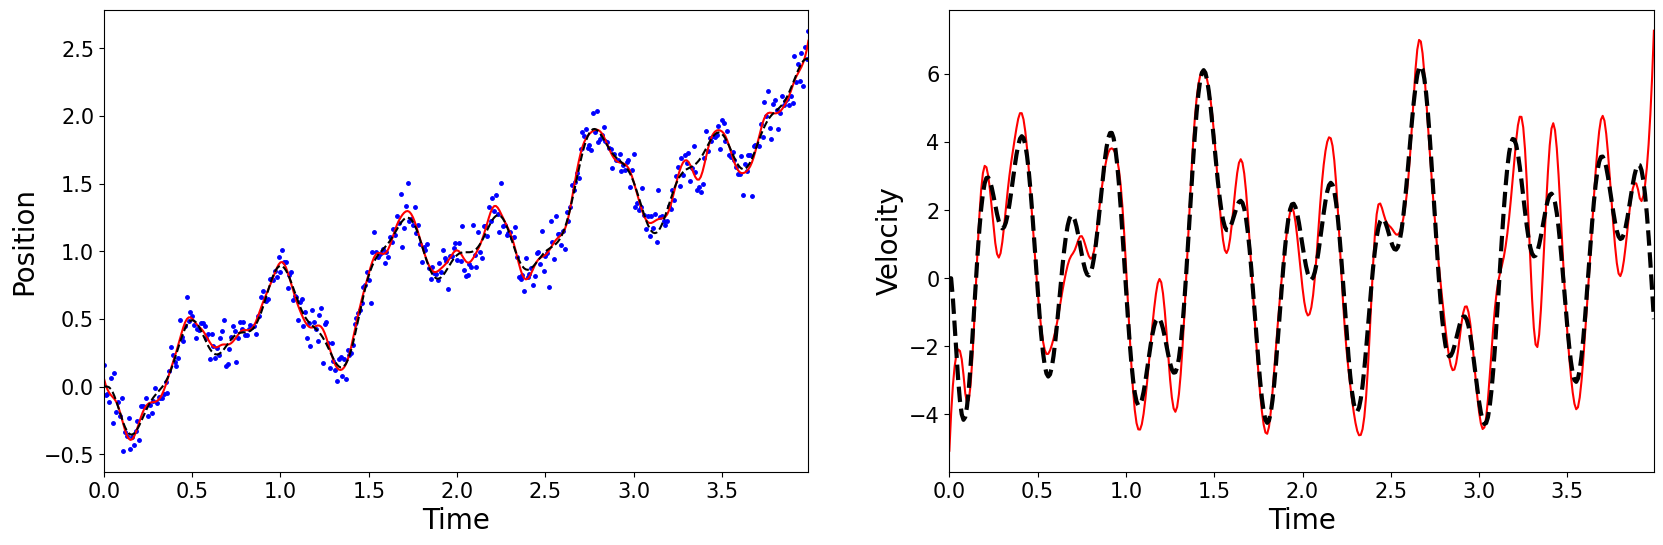

In [43]:
x_hat, dxdt_hat = pynumdiff.linear_model.polydiff(x, dt, polynomial_order=2, window_size=21)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.3 Linear Models: Savitzky-Golay filter

RMS error in velocity:  0.6695320553291174


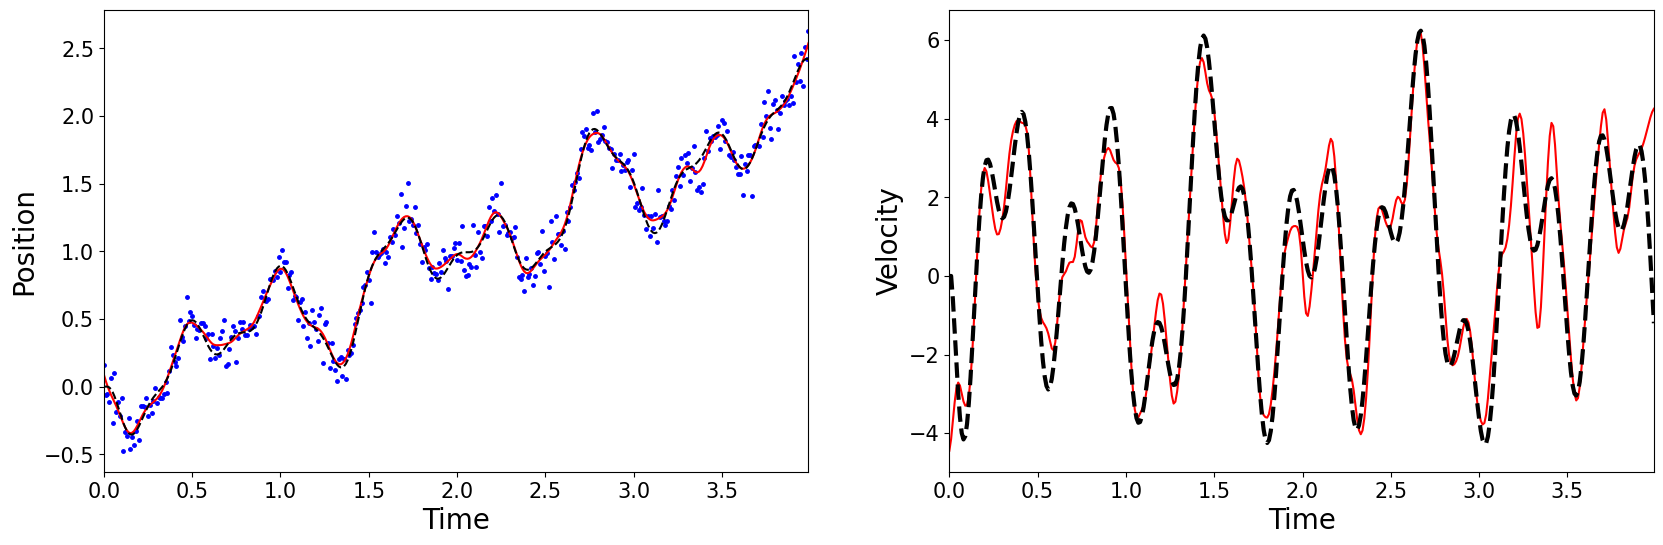

In [44]:
x_hat, dxdt_hat = pynumdiff.linear_model.savgoldiff(x, dt, polynomial_order=2, window_size=10, smoothing_win=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.4 Linear Models: Sliding chebychev polynomial fit - removed to simplify package requirements. See #67

### 4.5 Linear Models: Sliding linear time invariant system fit

RMS error in velocity:  1.0886636195549486


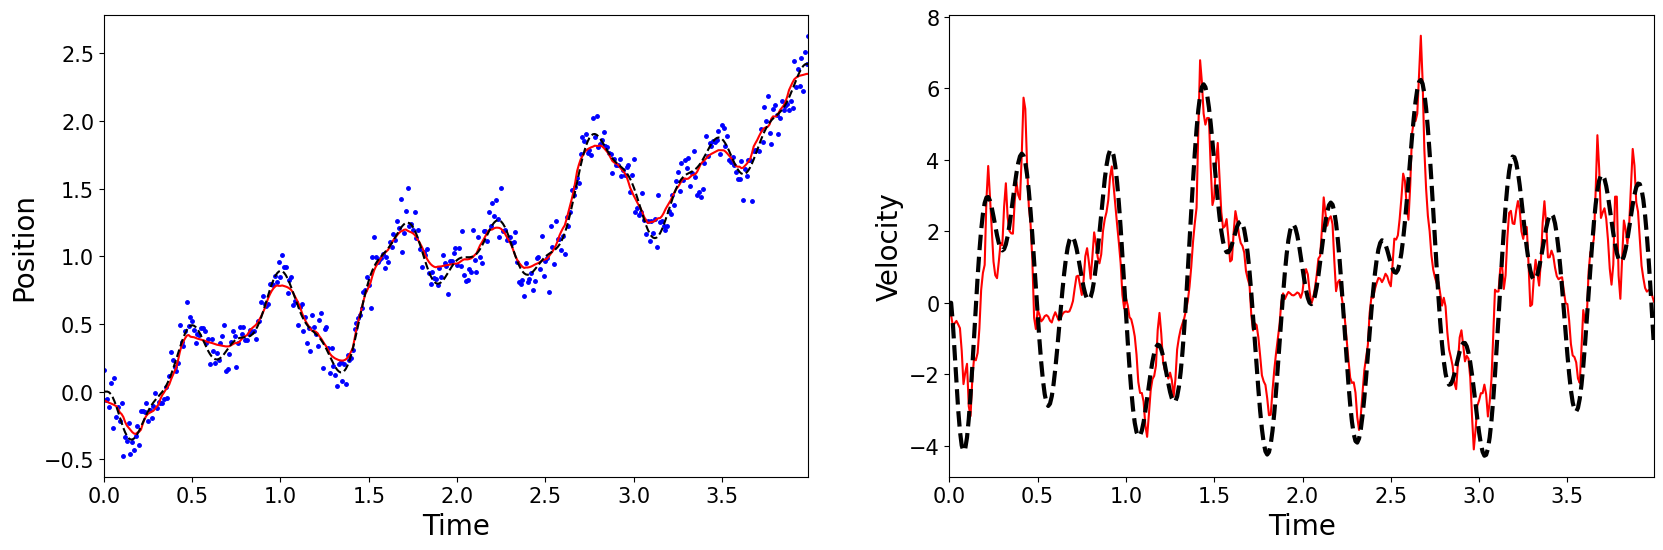

In [52]:
x_hat, dxdt_hat = pynumdiff.linear_model.lineardiff(x, dt, order=3, gamma=10, window_size=21)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

## Kalman smoothing

### 5.1 Kalman smoothing: constant velocity (forward-backward)

RMS error in velocity:  1.4509314563236002


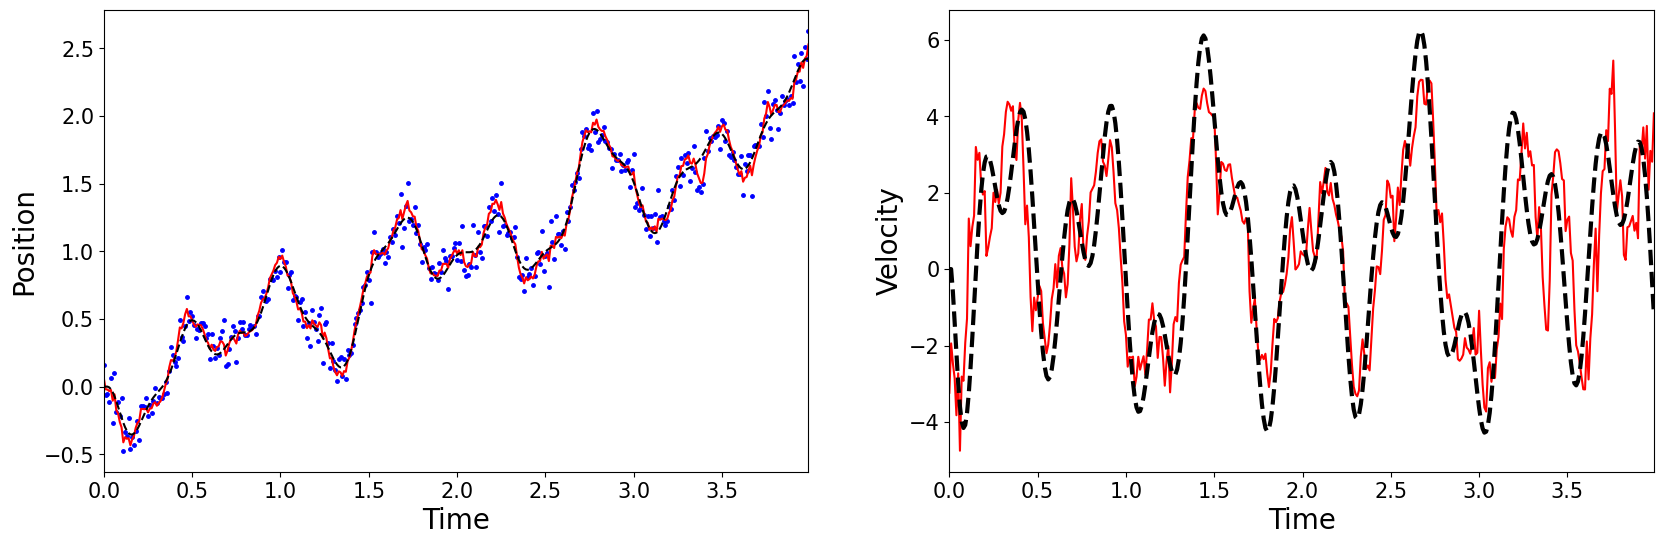

In [56]:
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_velocity(x, dt, r=noise_parameters[1]**2, q=1)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.2 Kalman smoothing: constant acceleration (forward-backward)

RMS error in velocity:  1.8653904012907518


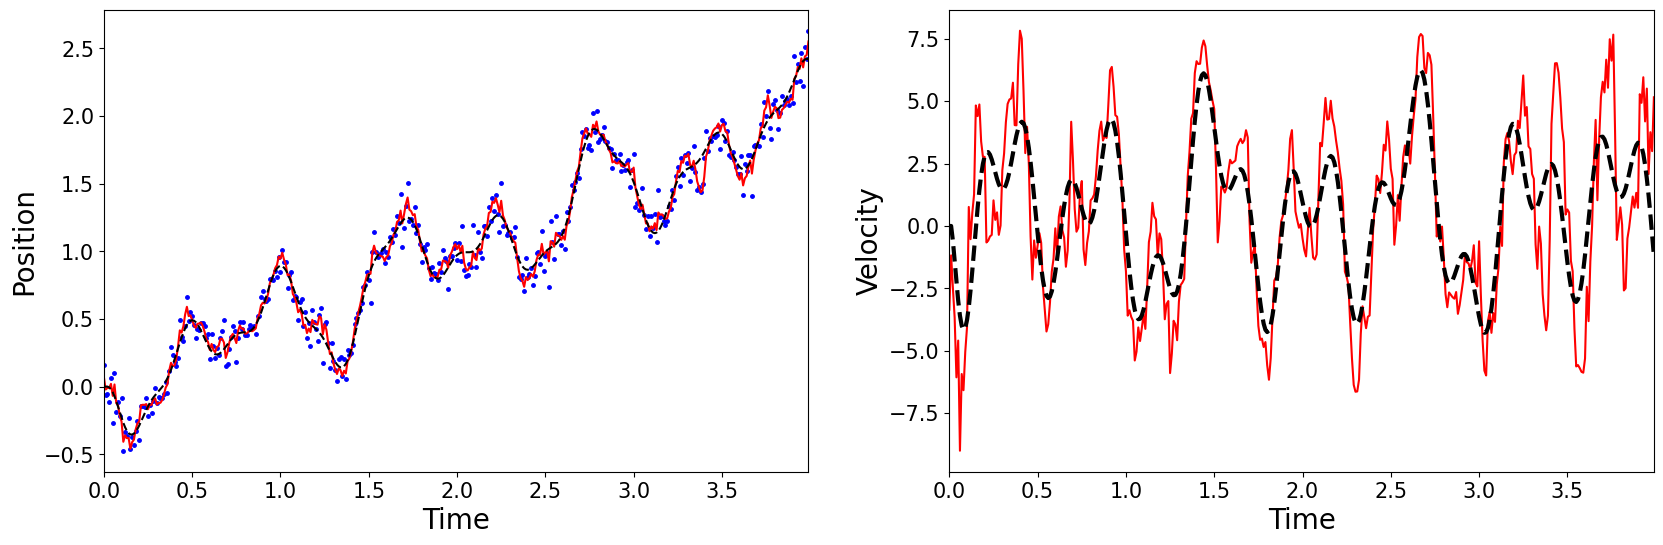

In [61]:
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_acceleration(x, dt, r=noise_parameters[1]**2, q=1e3)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.3 Kalman smoothing: constant jerk (forward-backward)

RMS error in velocity:  2.517194963250176


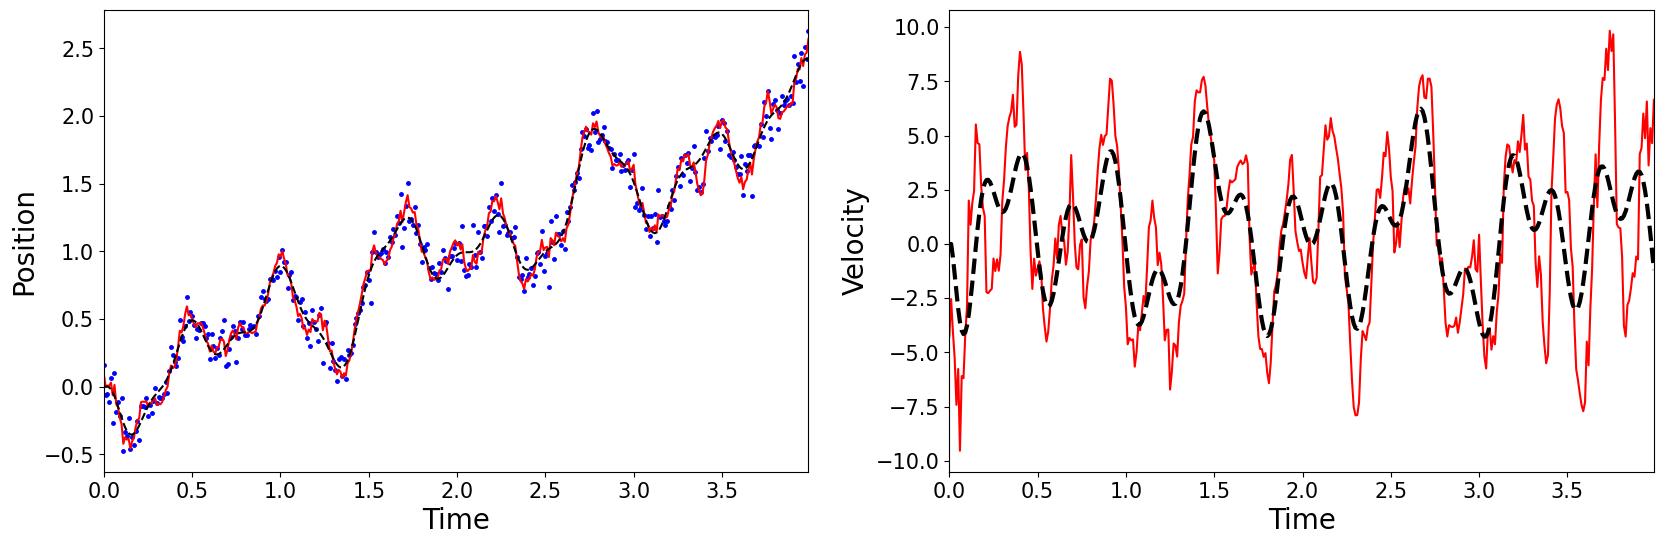

In [69]:
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_jerk(x, dt, r=noise_parameters[1]**2, q=1e5)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)